In [9]:
import psutil
p = psutil.Process()
p.cpu_affinity([0])
import os 
import numpy as np
import matplotlib.pyplot as plt

from lalframe.utils.frtools import get_channels

from scipy.signal.windows import tukey

from gwpy.timeseries import TimeSeries

In [2]:
trigger_time = 1187008882.43
duration = 128
post_trigger_duration = 2
gps_start = trigger_time - duration + post_trigger_duration
gps_end = trigger_time + post_trigger_duration
tukey_alpha = 2 / (duration / 2)
fmin = 20.0
fmax = 2048.0
data_path = "/home/thibeau.wouters/gw-datasets/GW170817/" # on CIT

In [18]:
data_dict = {"TurboPE": {"H1": {"freqs": [],
                                "data": []},
                         "L1": {"freqs": [],
                                "data": []},
                         "V1": {"freqs": [],
                                "data": []}},
             
             "GWOSC": {"H1": {"freqs": [],
                              "data": []},
                       "L1": {"freqs": [],
                              "data": []},
                       "V1": {"freqs": [],
                              "data": []}},
             
             "txt": {"H1": {"freqs": [],
                              "data": []},
                       "L1": {"freqs": [],
                              "data": []},
                       "V1": {"freqs": [],
                              "data": []}}
}

Load TurboPE data

In [4]:
from jimgw.single_event.detector import H1, L1, V1

In [19]:
for detector, name in zip([H1, L1, V1], ["H", "L", "V"]):
    file = f"{data_path}GW170817-IMRD_data0_1187008882-43_generation_data_dump.pickle_{name}1_fd_strain.txt"
    print("File: ", file)
    
    f, re, im = np.genfromtxt(file).T
    data = re + 1j * im
    
    mask = (f > fmin) & (f < fmax)
    f = f[mask]
    data = data[mask]
    
    print(data)

    data_dict["TurboPE"][f"{name}1"]["freqs"] = f
    data_dict["TurboPE"][f"{name}1"]["data"] = data

File:  /home/thibeau.wouters/gw-datasets/GW170817/GW170817-IMRD_data0_1187008882-43_generation_data_dump.pickle_H1_fd_strain.txt
[-1.74931101e-21+1.87494194e-21j -2.66667685e-21-1.09439403e-21j
  1.08988113e-21+3.81697246e-22j ...
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j]
File:  /home/thibeau.wouters/gw-datasets/GW170817/GW170817-IMRD_data0_1187008882-43_generation_data_dump.pickle_L1_fd_strain.txt
[-2.26688589e-22-5.71866097e-22j -1.81903183e-22-8.55531062e-22j
  3.24398529e-22-6.50114309e-24j ...
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j]
File:  /home/thibeau.wouters/gw-datasets/GW170817/GW170817-IMRD_data0_1187008882-43_generation_data_dump.pickle_V1_fd_strain.txt
[-1.18477387e-20-1.68365400e-20j -1.97539780e-21-2.48083045e-20j
  1.69993470e-20-1.18814513e-20j ...
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j]


In [6]:
ext = "gwf"
freq = 16
for detector, name in zip([H1, L1, V1], ["H", "L", "V"]):
    
    file = f"{data_path}{name}-{name}1_LOSC_CLN_{freq}_V1-1187007040-2048.gwf"   
    print("Example file: ", file)
    channel = f"{name}1:LOSC-STRAIN"

    detector.load_data_from_frame(trigger_time, 
                                  duration - 2, 
                                  2,
                                  file, 
                                  channel,
                                  f_min = 20.0,
                                  f_max = 2048.0,
                                  tukey_alpha = tukey_alpha
                                  )
    data_dict["GWOSC"][f"{name}1"]["freqs"] = detector.frequencies
    data_dict["GWOSC"][f"{name}1"]["data"] = detector.data

Example file:  /home/thibeau.wouters/gw-datasets/GW170817/H-H1_LOSC_CLN_16_V1-1187007040-2048.gwf
Fetching data from frame file from /home/thibeau.wouters/gw-datasets/GW170817/H-H1_LOSC_CLN_16_V1-1187007040-2048.gwf...
data_td.value
[-1.75144480e-239 -2.08075225e-116 -9.73828492e-091 ...
  7.07185664e+270  1.12317206e+213  1.68786439e+236]


/home/thibeau.wouters/miniconda3/envs/jim/lib/python3.10/site-packages/jax/_src/numpy/lax_numpy.py:2147: RuntimeWarning: overflow encountered in cast
  out = np.array(object, dtype=dtype, ndmin=ndmin, copy=False)  # type: ignore[arg-type]
/home/thibeau.wouters/miniconda3/envs/jim/lib/python3.10/site-packages/jax/_src/numpy/lax_numpy.py:2147: RuntimeWarning: invalid value encountered in cast
  out = np.array(object, dtype=dtype, ndmin=ndmin, copy=False)  # type: ignore[arg-type]


Finished reading the data.
Example file:  /home/thibeau.wouters/gw-datasets/GW170817/L-L1_LOSC_CLN_16_V1-1187007040-2048.gwf
Fetching data from frame file from /home/thibeau.wouters/gw-datasets/GW170817/L-L1_LOSC_CLN_16_V1-1187007040-2048.gwf...
data_td.value
[2.09755213e-080 1.89942058e-080 1.83979519e-080 ...
 3.95300794e-243 3.95300794e-243 3.95300794e-243]
Finished reading the data.
Example file:  /home/thibeau.wouters/gw-datasets/GW170817/V-V1_LOSC_CLN_16_V1-1187007040-2048.gwf
Fetching data from frame file from /home/thibeau.wouters/gw-datasets/GW170817/V-V1_LOSC_CLN_16_V1-1187007040-2048.gwf...
data_td.value
[-8.41649609e+284 -8.41649609e+284 -8.41649609e+284 ...
  3.20911161e+006  3.20911161e+006  3.20911161e+006]
Finished reading the data.


[  20.007812   20.015625   20.023438 ... 2047.9766   2047.9844
 2047.9922  ]
freqs
data
[nan nan nan ... nan nan nan]
[  20.007812   20.015625   20.023438 ... 2047.9766   2047.9844
 2047.9922  ]
freqs
data
[nan nan nan ... nan nan nan]
[  20.007812   20.015625   20.023438 ... 2047.9766   2047.9844
 2047.9922  ]
freqs
data
[nan nan nan ... nan nan nan]


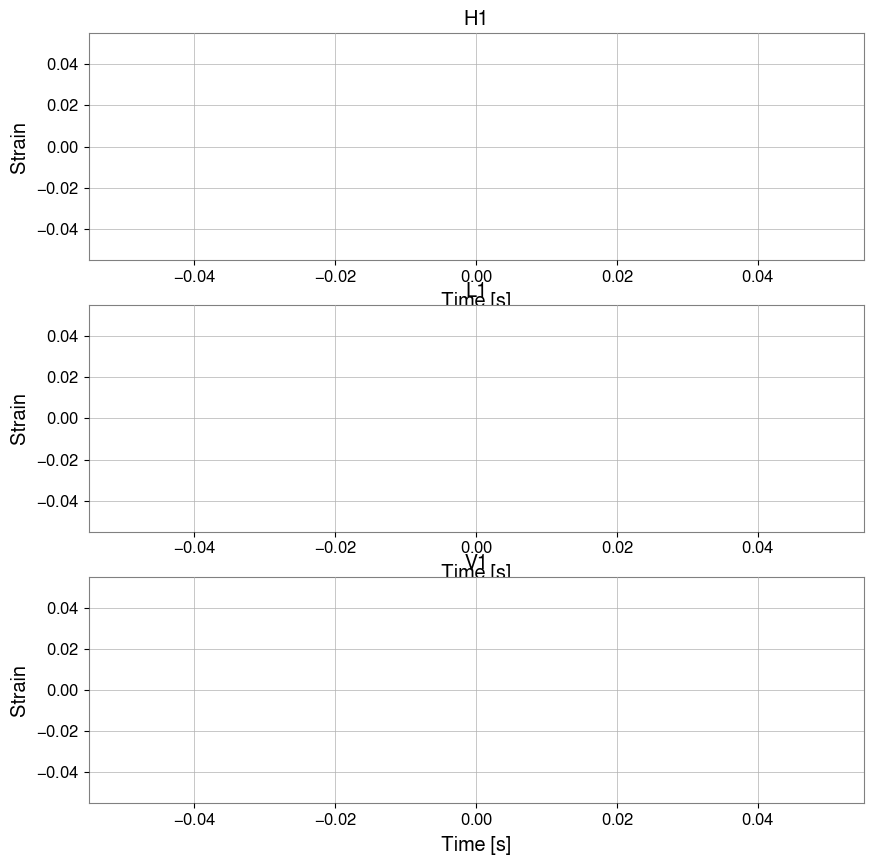

In [7]:
nrows = 3
plt.subplots(nrows=nrows, ncols=1, figsize=(10, 10))

for detector, name, i in zip([H1, L1, V1], ["H", "L", "V"], range(nrows)):
    plt.subplot(nrows, 1, i + 1)
    for key in ["GWOSC"]:
        freqs = data_dict[key][f"{name}1"]["freqs"]
        data = data_dict[key][f"{name}1"]["data"]
        data = np.real(data_dict[key][f"{name}1"]["data"])
        
        print(freqs)
        print("freqs")
        print("data")
        print(data)
        plt.plot(freqs, data, label=key)
    plt.title(f"{name}1")
    plt.xlabel("Time [s]")
    plt.ylabel("Strain")
    
plt.show()

## txt files

File:  /home/thibeau.wouters/gw-datasets/GW170817/H-H1_LOSC_CLN_16_V1-1187007040-2048.txt
len(data)
1048577
len(freqs)
259583
Finished reading the data.
True
Saving freqs for H1 to /home/thibeau.wouters/gw-datasets/GW170817/H1_freq.txt
Saving data for H1 to /home/thibeau.wouters/gw-datasets/GW170817/H1_data.txt


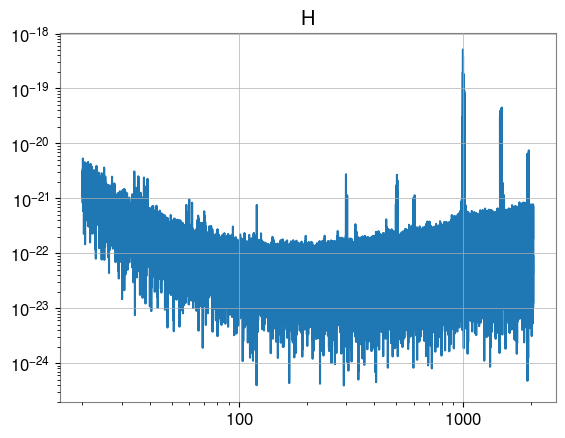

File:  /home/thibeau.wouters/gw-datasets/GW170817/L-L1_LOSC_CLN_16_V1-1187007040-2048.txt
len(data)
1048577
len(freqs)
259583
Finished reading the data.
True
Saving freqs for L1 to /home/thibeau.wouters/gw-datasets/GW170817/L1_freq.txt
Saving data for L1 to /home/thibeau.wouters/gw-datasets/GW170817/L1_data.txt


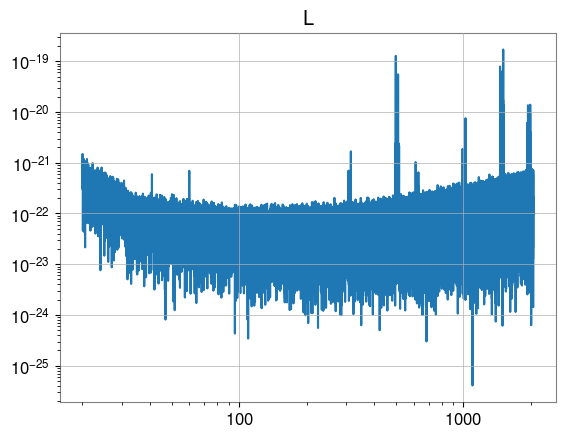

File:  /home/thibeau.wouters/gw-datasets/GW170817/V-V1_LOSC_CLN_16_V1-1187007040-2048.txt
len(data)
1048577
len(freqs)
259583
Finished reading the data.
True
Saving freqs for V1 to /home/thibeau.wouters/gw-datasets/GW170817/V1_freq.txt
Saving data for V1 to /home/thibeau.wouters/gw-datasets/GW170817/V1_data.txt


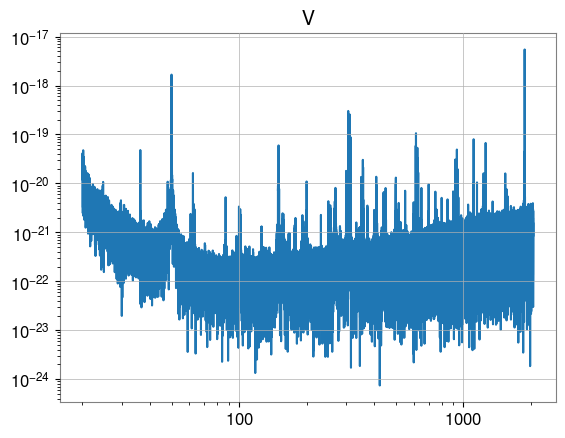

Done


In [25]:
data_freq_name = 16
for detector, name in zip([H1, L1, V1], ["H", "L", "V"]):
    file = f"{data_path}{name}-{name}1_LOSC_CLN_{data_freq_name}_V1-1187007040-2048.txt"   
    
    print("File: ", file)
    data = np.loadtxt(file)
    
    txt_duration = 2048
    f_sampling = 16384
    
    # Get time grid
    dt = 1 / f_sampling
    time = np.linspace(0, txt_duration, f_sampling * txt_duration)
    assert len(time) == len(data), "Wrong"
    txt_trigger_time = 1842.43
    # Limit times to be between window and mask data as well
    time_start = txt_trigger_time - duration + 2
    time_end = txt_trigger_time + 2
    ### TODO: apply mask elsewhere?
    mask = (time > time_start) & (time < time_end)
    # time = time[mask]
    data = data[mask]
    
    # Do FFT to get frequencies
    n = len(data)
    data_fd = np.fft.rfft(np.array(data) * tukey(n, tukey_alpha)) * dt
    freq = np.fft.rfftfreq(n, dt)

    print("len(data)")
    print(len(data_fd))
    
    print("len(freqs)")
    print(len(freqs))

    print("Finished reading the data.")

    mask = (freq > fmin) & (freq < fmax)
    freq = freq[mask]
    data_fd = data_fd[mask]
    
    # Save here locally
    
    data_dict["txt"][f"{name}1"]["freqs"] = freq
    data_dict["txt"][f"{name}1"]["data"] = data_fd
    
    print(len(data_fd) == len(freq))
    
    # Save to new txt files to use later on
    save_name = data_path + f"{name}1_freq.txt"
    print(f"Saving freqs for {name}1 to {save_name}")
    np.savetxt(save_name, freq)
    
    save_name = data_path + f"{name}1_data.txt"
    print(f"Saving data for {name}1 to {save_name}")
    np.savetxt(save_name, data_fd)
    
    plt.loglog(freq, np.abs(data_fd))
    plt.title(name)
    plt.show()
    
print("Done")

Compare against the existing data

File:  /home/thibeau.wouters/gw-datasets/GW170817/GW170817-IMRD_data0_1187008882-43_generation_data_dump.pickle_H1_fd_strain.txt


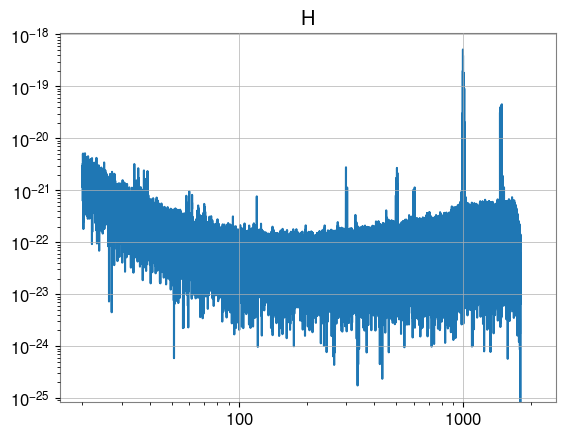

File:  /home/thibeau.wouters/gw-datasets/GW170817/GW170817-IMRD_data0_1187008882-43_generation_data_dump.pickle_L1_fd_strain.txt


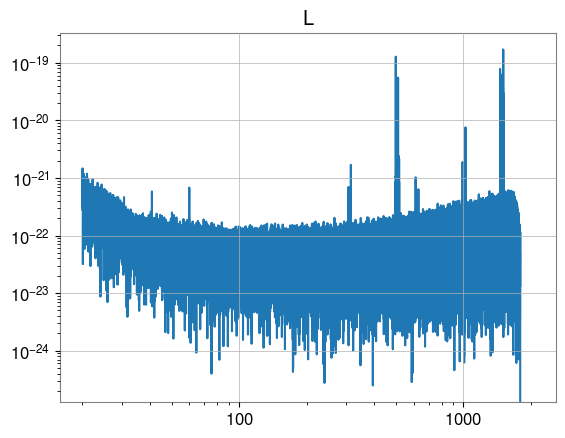

File:  /home/thibeau.wouters/gw-datasets/GW170817/GW170817-IMRD_data0_1187008882-43_generation_data_dump.pickle_V1_fd_strain.txt


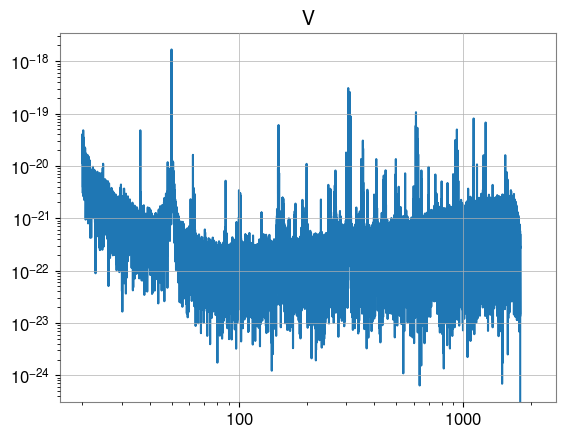

Done


In [28]:
data_freq_name = 16
for detector, name in zip([H1, L1, V1], ["H", "L", "V"]):
    file = f"{data_path}GW170817-IMRD_data0_1187008882-43_generation_data_dump.pickle_{name}1_fd_strain.txt"   
    
    print("File: ", file)
    f, data_re, data_im = np.loadtxt(file, unpack=True)
    data = data_re + 1j * data_im
    
    mask = (f > fmin) & (f < fmax)
    f = f[mask]
    data = data[mask]
    
    plt.loglog(f, np.abs(data))
    plt.title(name)
    plt.show()
    
print("Done")

## Compare the PSDs as well

/home/thibeau.wouters/gw-datasets/GW170817/GW170817-IMRD_data0_1187008882-43_generation_data_dump.pickle_H1_psd.txt
/home/thibeau.wouters/gw-datasets/GW170817/GW170817_h1_psd.txt
/home/thibeau.wouters/gw-datasets/GW170817/GW170817-IMRD_data0_1187008882-43_generation_data_dump.pickle_L1_psd.txt
/home/thibeau.wouters/gw-datasets/GW170817/GW170817_l1_psd.txt
/home/thibeau.wouters/gw-datasets/GW170817/GW170817-IMRD_data0_1187008882-43_generation_data_dump.pickle_V1_psd.txt
/home/thibeau.wouters/gw-datasets/GW170817/GW170817_v1_psd.txt


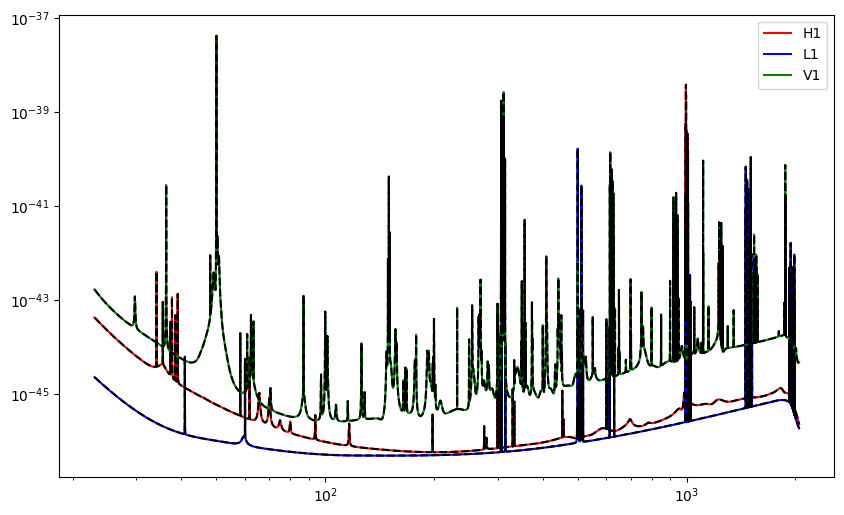

In [ ]:
plt.figure(figsize=(10, 6))
for det, color in zip(["H", "L", "V"], ["red", "blue", "green"]):
    data_path = "/home/thibeau.wouters/gw-datasets/GW170817/" # on CIT
    file = f"{data_path}GW170817-IMRD_data0_1187008882-43_generation_data_dump.pickle_{det}1_psd.txt"

    print(file)

    freq, psd = np.loadtxt(file, unpack=True)
    plt.loglog(freq, psd, color = color, linestyle = "-", label = f"{det}1")
    
    file = f"{data_path}GW170817_{det.lower()}1_psd.txt"
    
    print(file)

    freq, psd = np.loadtxt(file, unpack=True)
    plt.loglog(freq, psd, linestyle = "--", color = "black")
    
plt.legend()
plt.show()